# Practica 3: Sensado y An&aacute;lisis Inercial 

<style>
    .imagen-ajustada {
        width: 900px;
        height: 280px;
        border-radius: 20px;
    }
</style>

<img src="Sentadillas.png" alt="Una imagen" class="imagen-ajustada">

En el notebook que se presenta a continuaci&oacute;n se tienen que procesar los datos inerciales por medio de sensores IMU, esta pr&aacute;ctica se hace con el fin de clasificar si la persona que se encuentra haciendo sentadillas lo hace de forma correcta o incorrecta, con el fin de ayudar a que se hagan de forma correcta y eviten lesiones por hacer ejercicios de forma incorrecta.
Los sensores IMU se pusieron uno en cada pantorrilla, uno en cada muslo y uno en la espalda baja del participante, siendo un total de 5 sensores. En total  fueron 10 participantes voluntarios en la toma de sus datos y as&iacute; utilizarlos en la pr&aacute;ctica, logrando as&iacute; poder entrenar nuestro modelo de forma eficiente.    

## Librer&iacute;as Importadas

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

## Manejo del dataset

En esta secci&oacute;n se empieza a definir la ruta donde estan los videos para poder extraerlos y comenzar a modelarlos dentro de un dataframe.

El código carga archivos CSV desde un directorio en un diccionario, usando los nombres de archivo como claves y los contenidos como DataFrames de pandas, de manera ordenada.

In [42]:
carpeta = "./Data/"
list_df = {}

list_df = {file[:-4]: pd.read_csv(os.path.join(carpeta, file)) for file in sorted(os.listdir(carpeta))}

In [43]:
list_df['Ariana']

SensorId   TimeStamp (s)   FrameNumber   AccX (g)   AccY (g)   AccZ (g)  \
0            3            0.00             0   0.037442  -0.887220  -0.443245   
1            3            0.01             1   0.036721  -0.889475  -0.442183   
2            3            0.02             2   0.032726  -0.894212  -0.439177   
3            2           -0.00             0   0.021711  -0.998011  -0.022004   
4            2            0.01             1   0.025251  -0.997908  -0.021955   
...        ...             ...           ...        ...        ...        ...   
4666         1           20.43          1997   0.738899  -0.662809  -0.146655   
4667         3           20.32          1951  -0.029160  -0.756100  -0.575292   
4668         1           20.44          1998   0.747496  -0.671228  -0.157344   
4669         3           20.33          1952  -0.013723  -0.769684  -0.603328   
4670         1           20.45          1999   0.747009  -0.674096  -0.156266   

       GyroX (deg/s)   GyroY (deg/s)   GyroZ (deg/s)   MagX (uT)  ...  \
0          -0.368823       -1.200886       -0.566767  -25.840397  ...   
1          -0.633702       -1.097575       -0.549118  -26.308096  ...   
2          -0.988580       -1.114592       -0.672775  -25.957323  ...   
3          -0.022777        0.758312        0.276806  -52.323883  ...   
4          -0.023209        0.516617        0.291440  -52.002338  ...   
...              ...             ...             ...         ...  ...   
4666      -12.331003      -25.610823      -32.909512  -26.132710  ...   
4667      -43.811047        1.105879        2.535139  -26.863489  ...   
4668      -11.067548      -27.715807      -33.152092  -26.161942  ...   
4669      -44.257469        1.772645        3.551233  -27.389652  ...   
4670      -11.392050      -31.681248      -33.381763  -25.752703  ...   

         QuatX     QuatY     QuatZ   LinAccX (g)   LinAccY (g)   LinAccZ (g)  \
0    -0.042603 -0.010431 -0.010769      0.000900      0.000134     -0.007537   
1    -0.042544 -0.010426 -0.010663      0.001644      0.002314     -0.006192   
2    -0.043390 -0.009775 -0.010604      0.005367      0.007048     -0.003777   
3     0.003627 -0.002929 -0.006640     -0.000606      0.000704     -0.001510   
4     0.003628 -0.002905 -0.006686     -0.004193      0.000754     -0.001559   
...        ...       ...       ...           ...           ...           ...   
4666  0.182456 -0.292122 -0.114571     -0.074021      0.006754     -0.055387   
4667  0.070745  0.001073  0.128516      0.031398      0.048373     -0.044906   
4668  0.184435 -0.294731 -0.112711     -0.077722     -0.001549     -0.043593   
4669  0.074583  0.000733  0.128144      0.011367      0.032077     -0.018233   
4670  0.186581 -0.297344 -0.110546     -0.072893      0.003125     -0.036034   

       Pressure (kPa)   Altitude (m)   Temperature (degC)   HeaveMotion (m)  
0                 0.0            0.0                  0.0               0.0  
1                 0.0            0.0                  0.0               0.0  
2                 0.0            0.0                  0.0               0.0  
3                 0.0            0.0                  0.0               0.0  
4                 0.0            0.0                  0.0               0.0  
...               ...            ...                  ...               ...  
4666              0.0            0.0                  0.0               0.0  
4667              0.0            0.0                  0.0               0.0  
4668              0.0            0.0                  0.0               0.0  
4669              0.0            0.0                  0.0               0.0  
4670              0.0            0.0                  0.0               0.0  

[4671 rows x 26 columns]

In [44]:
list_df["Andrea"].columns

Index(['SensorId', ' TimeStamp (s)', ' FrameNumber', ' AccX (g)', ' AccY (g)',
       ' AccZ (g)', ' GyroX (deg/s)', ' GyroY (deg/s)', ' GyroZ (deg/s)',
       ' MagX (uT)', ' MagY (uT)', ' MagZ (uT)', ' EulerX (deg)',
       ' EulerY (deg)', ' EulerZ (deg)', ' QuatW', ' QuatX', ' QuatY',
       ' QuatZ', ' LinAccX (g)', ' LinAccY (g)', ' LinAccZ (g)',
       ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',
       ' HeaveMotion (m)'],
      dtype='object')

## An&aacute;lisis Exploratorio

In [45]:
for nombre, df in list_df.items():
    print(f"Estadísticas Descriptivas para: {nombre}")
    print(df.describe())
    print("-" * 50)

Estadísticas Descriptivas para: Andrea
          SensorId   TimeStamp (s)   FrameNumber     AccX (g)     AccY (g)  \
count  8837.000000     8837.000000   8837.000000  8837.000000  8837.000000   
mean      2.654294       12.300205   1129.604956     0.087581    -0.818524   
std       1.096461        7.203817    678.096653     0.332553     0.216757   
min       1.000000        0.000000      0.000000    -0.529415    -1.075732   
25%       2.000000        6.230000    552.000000    -0.120553    -0.961907   
50%       3.000000       12.130000   1104.000000     0.067255    -0.913884   
75%       4.000000       18.050100   1656.000000     0.288664    -0.741644   
max       4.000000       26.430000   2622.000000     1.063124     0.011848   

          AccZ (g)   GyroX (deg/s)   GyroY (deg/s)   GyroZ (deg/s)  \
count  8837.000000     8837.000000     8837.000000     8837.000000   
mean     -0.235155       -0.594927        0.388790       -0.539552   
std       0.336797       15.402751        6.8405

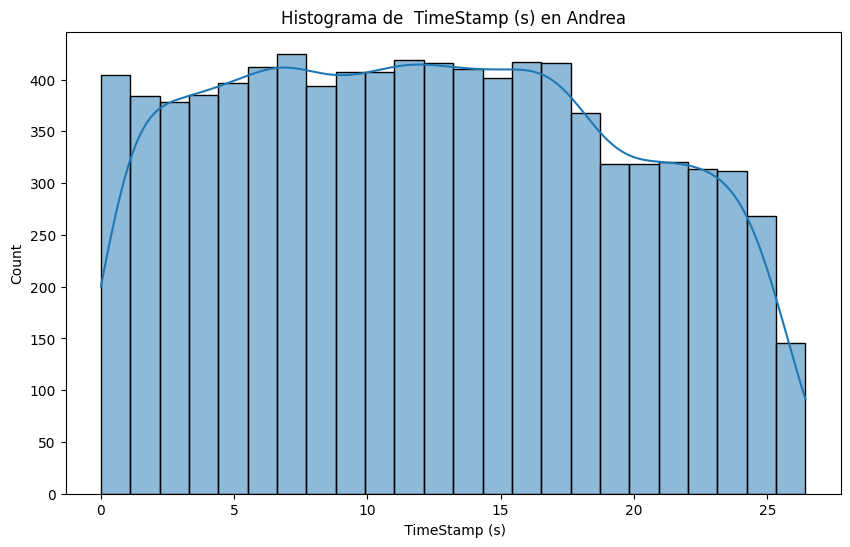

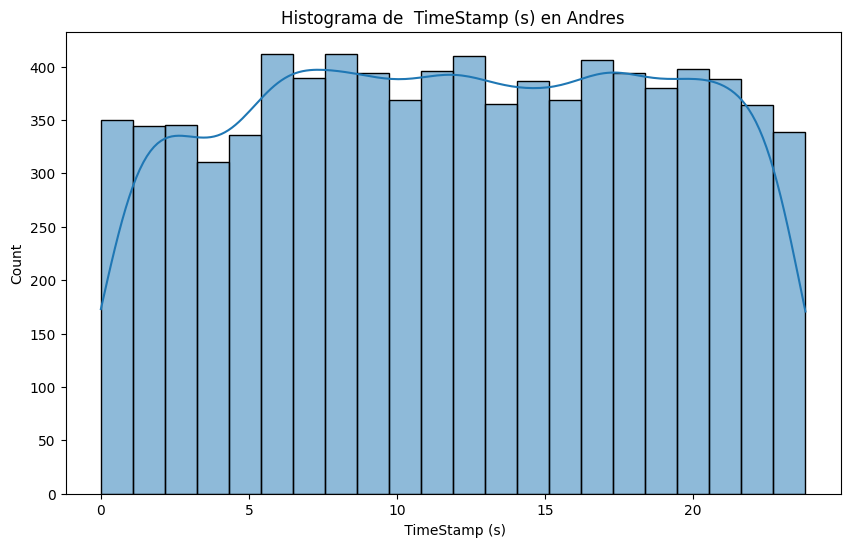

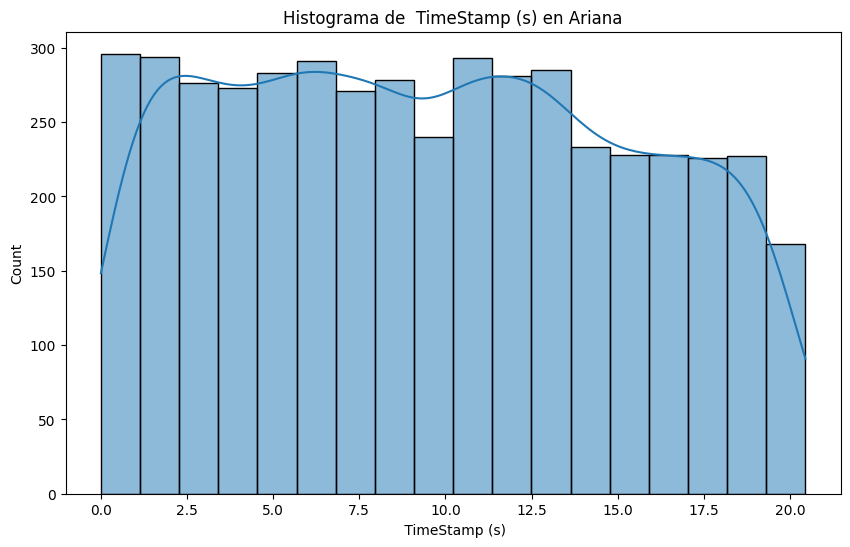

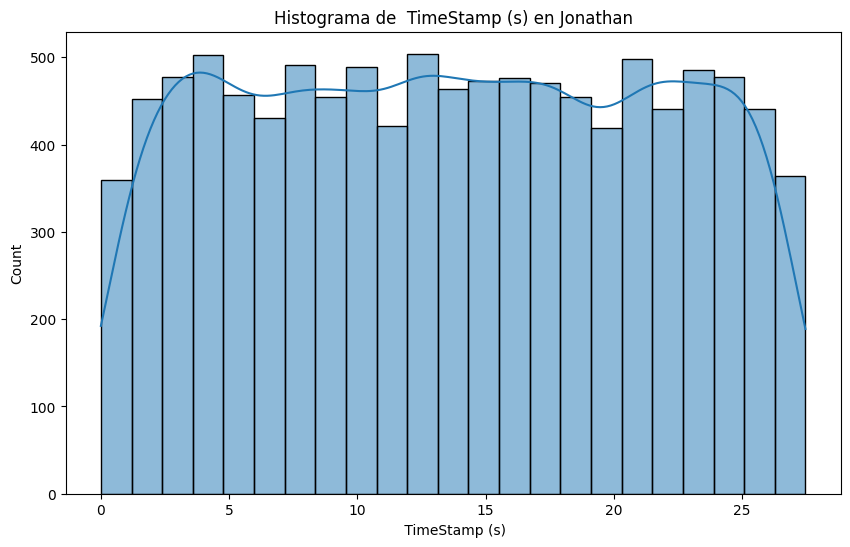

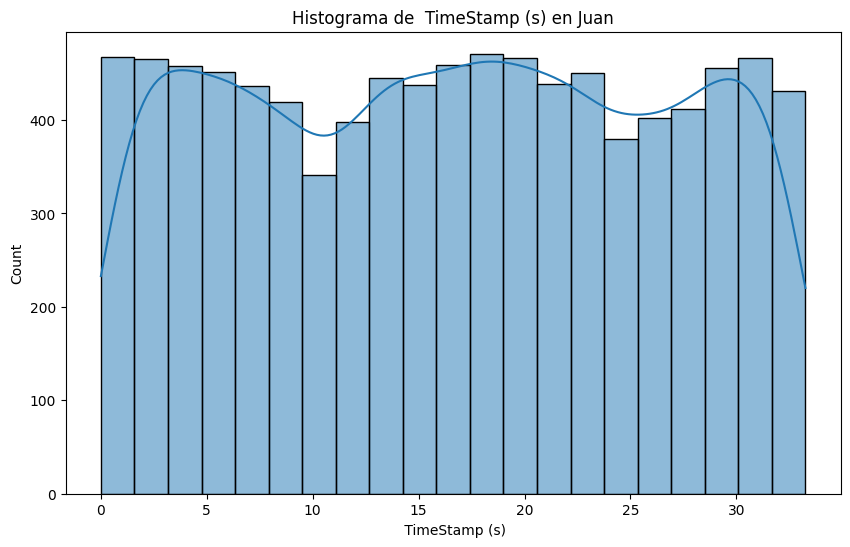

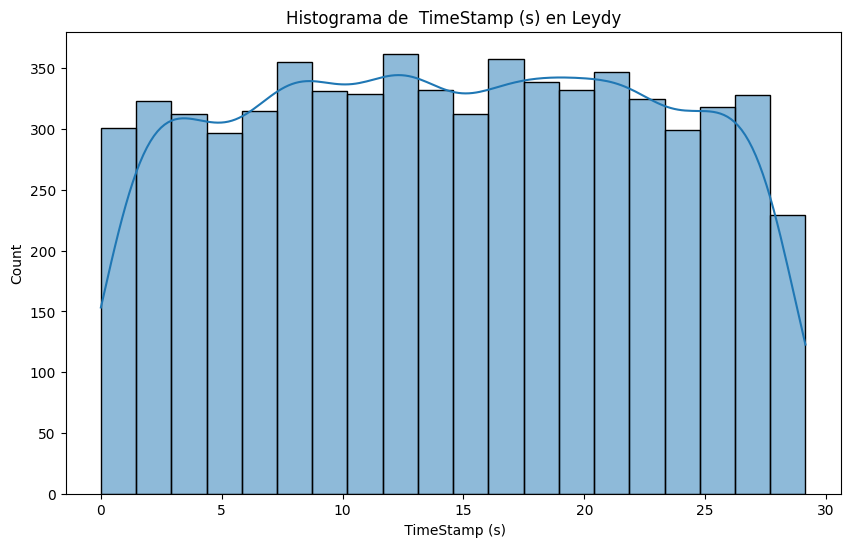

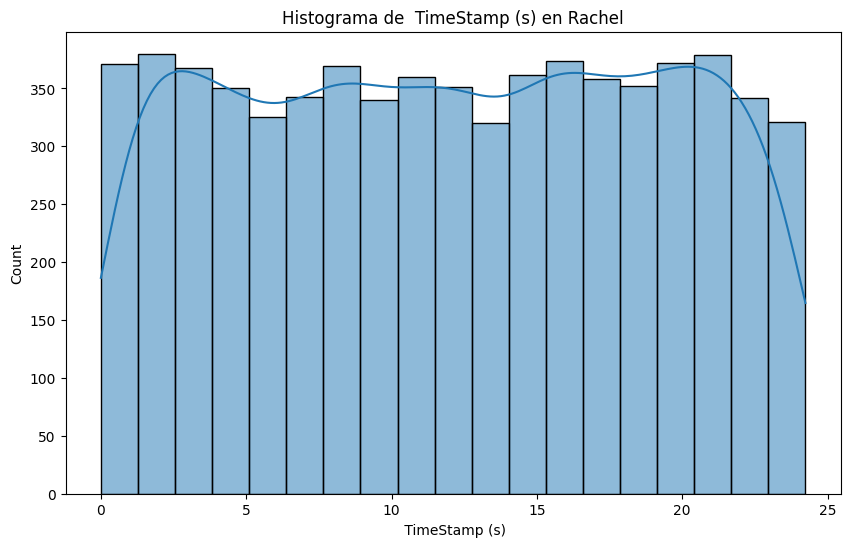

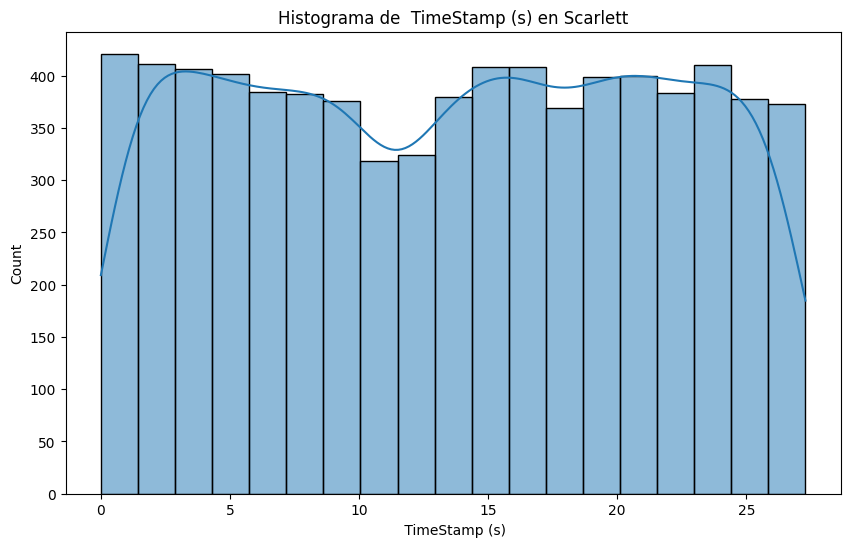

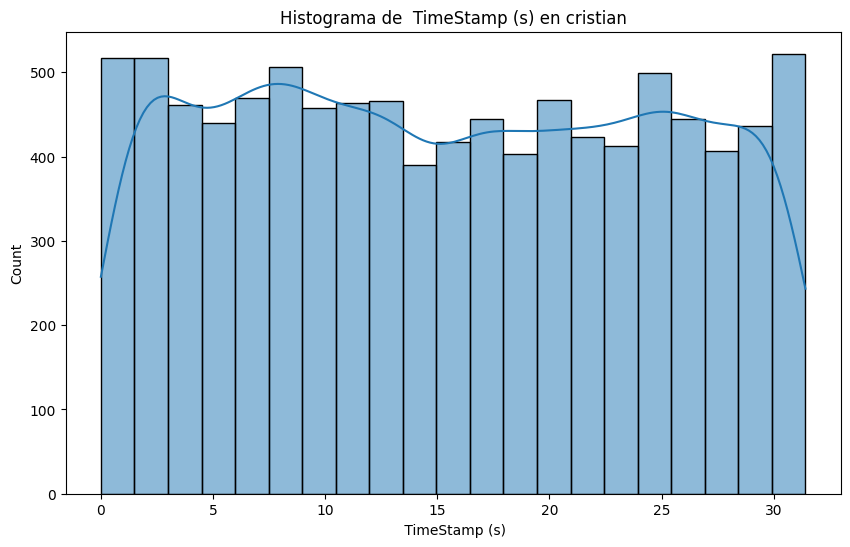

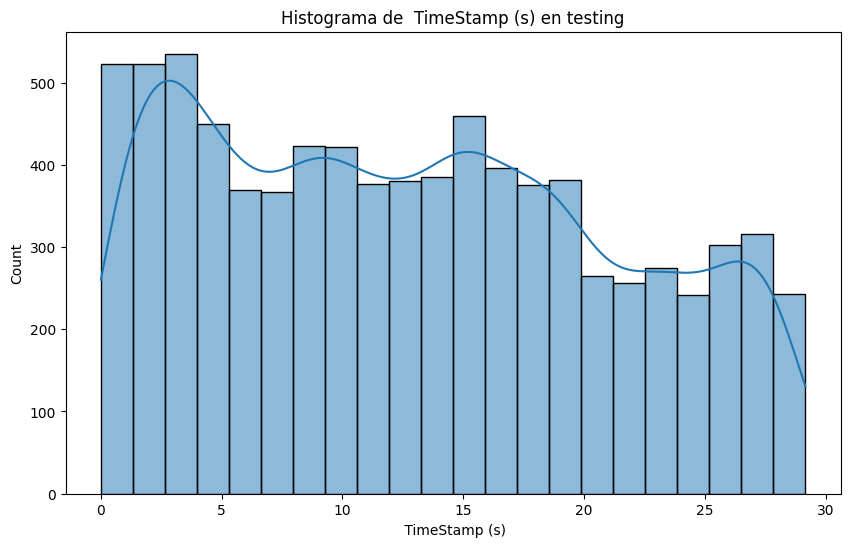

In [46]:
for nombre, df in list_df.items():
    # Ejemplo de un histograma para la primera columna numérica
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df.columns[1]], kde=True)
    plt.title(f'Histograma de {df.columns[1]} en {nombre}')
    plt.show()

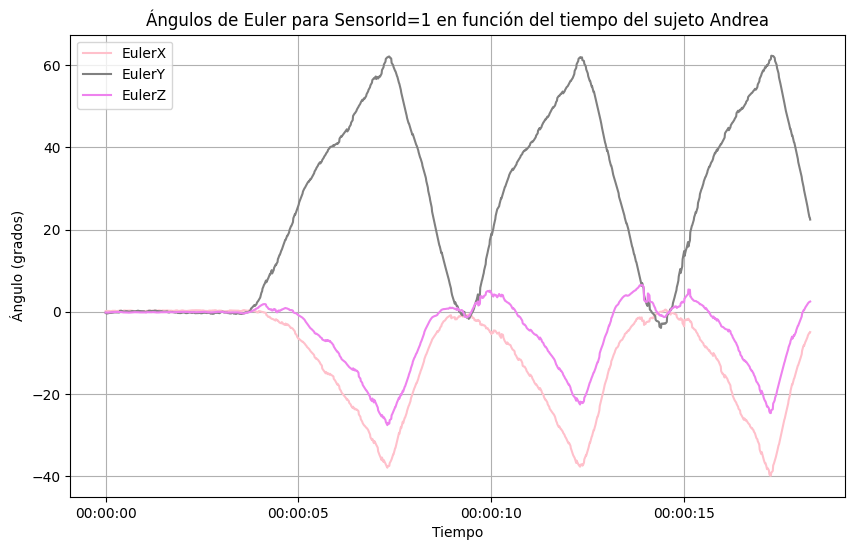

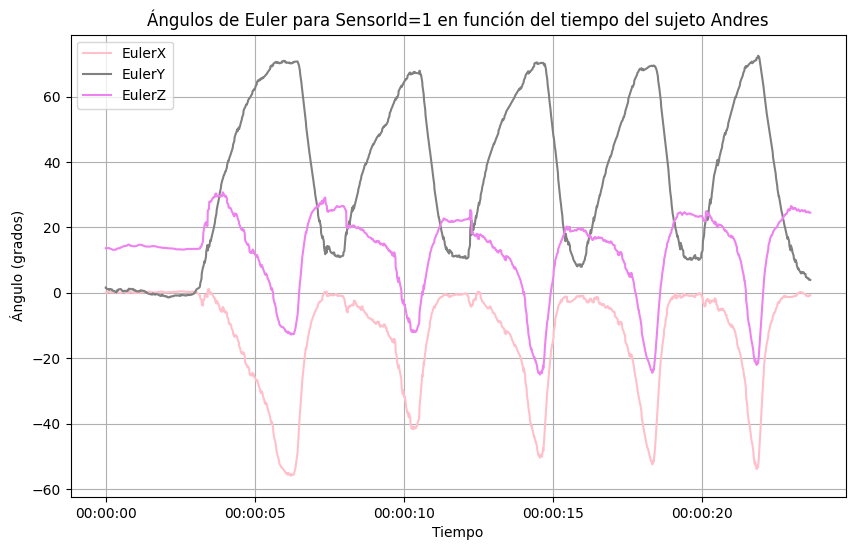

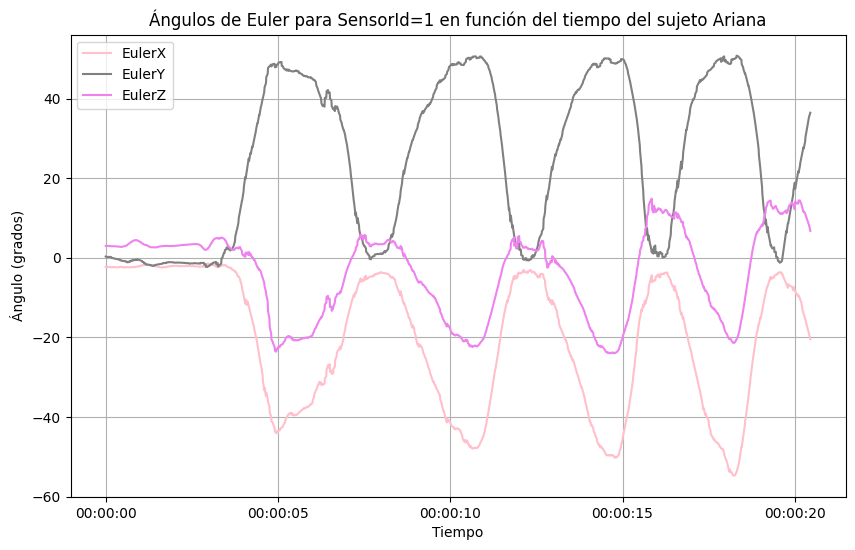

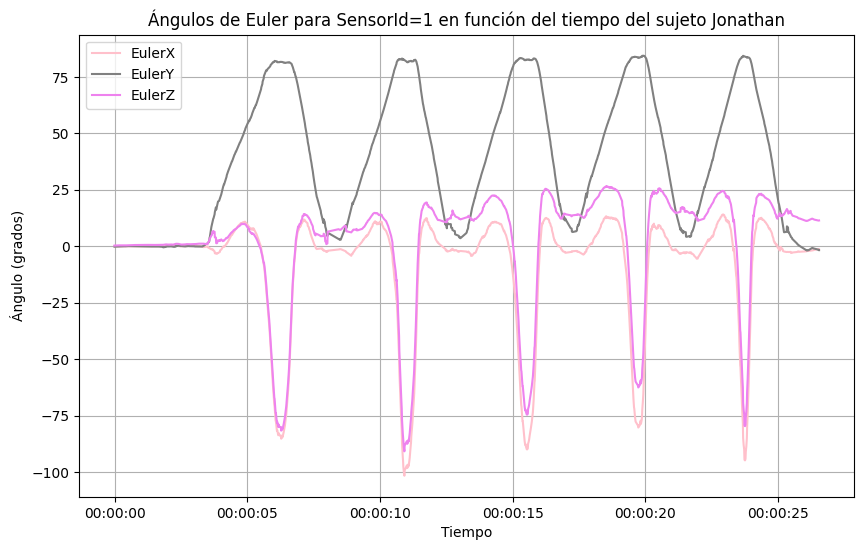

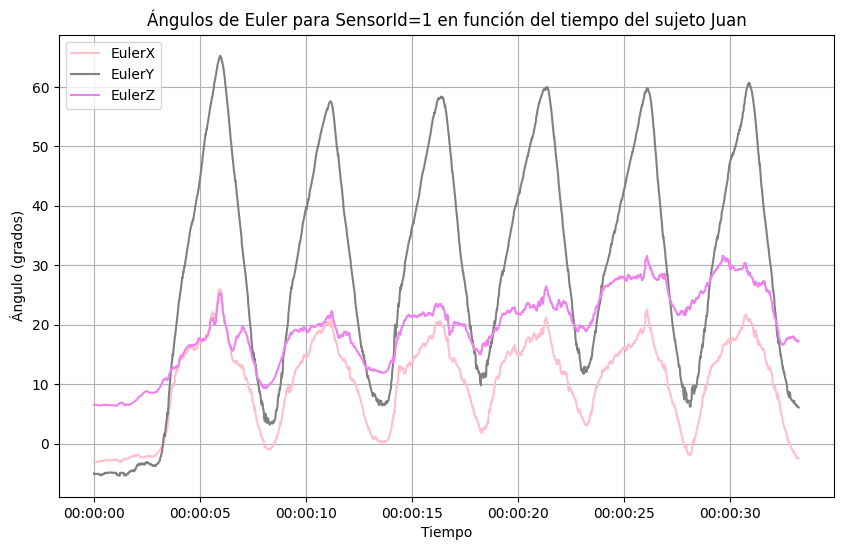

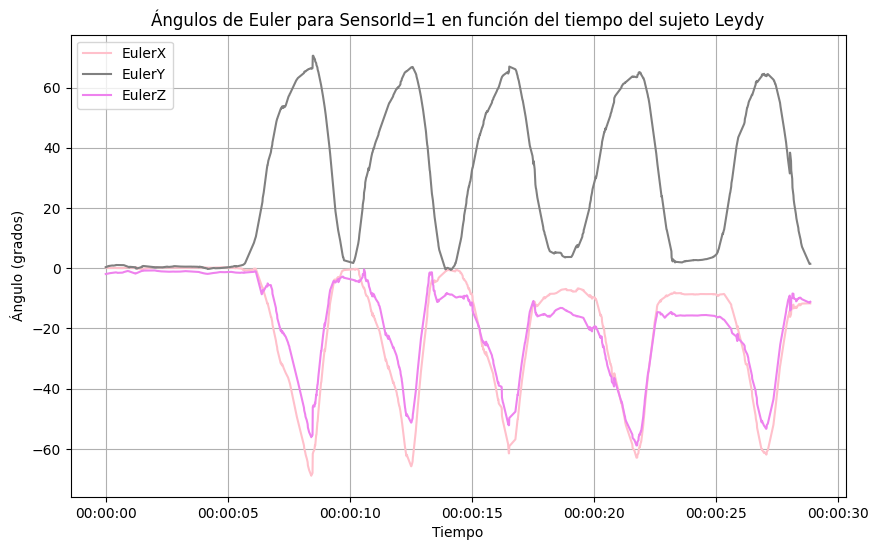

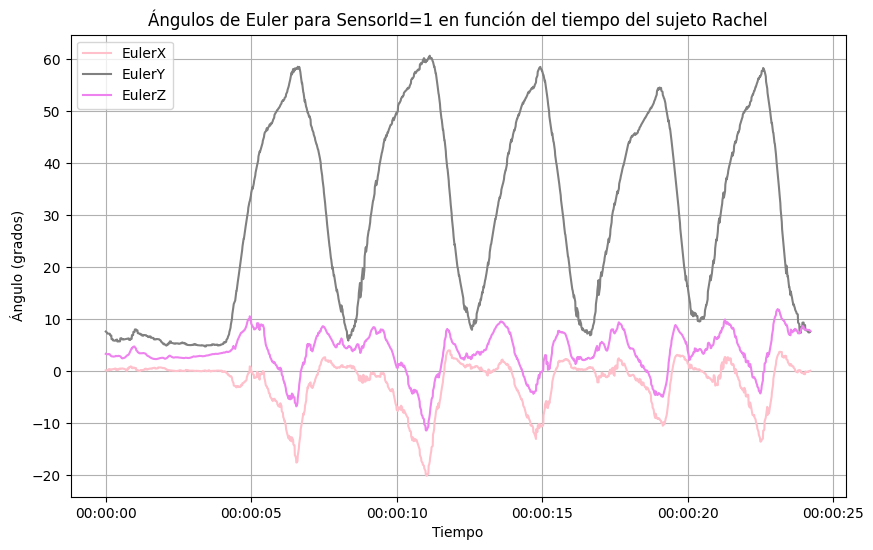

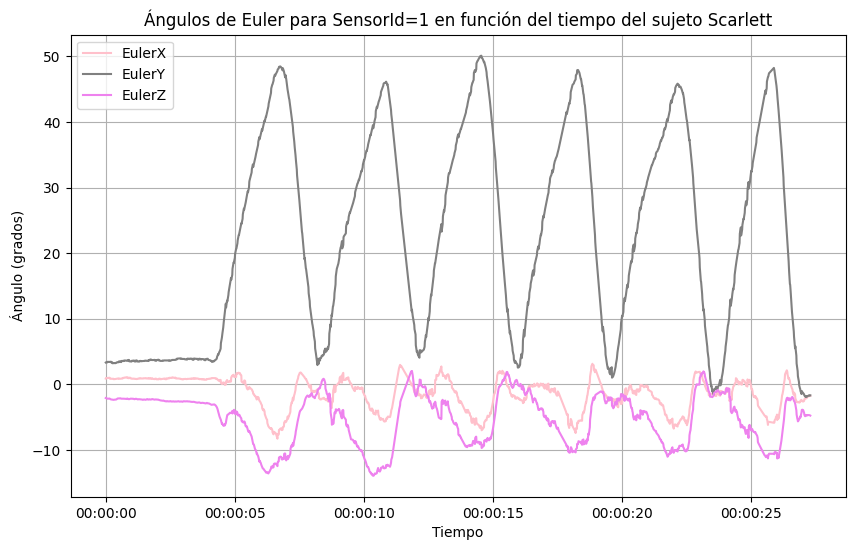

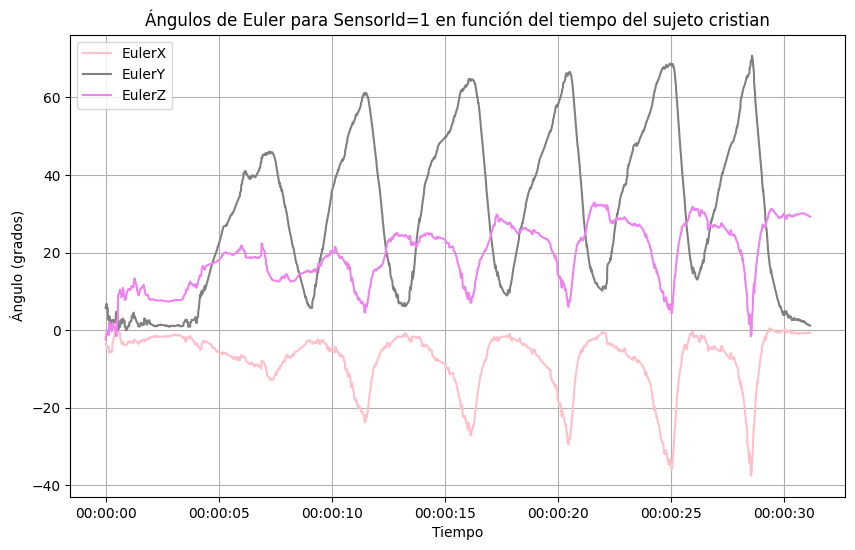

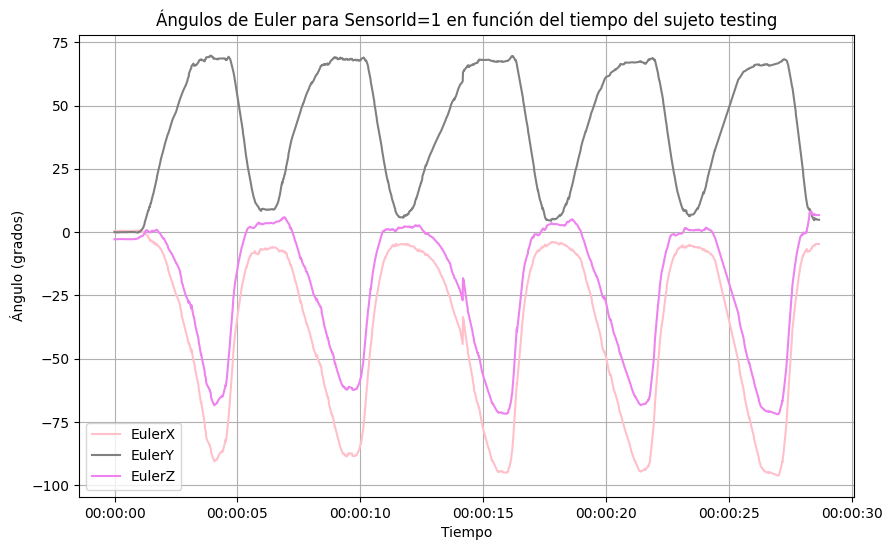

In [52]:
for index in list_df:
    df = list_df[index]
    
    df_sensor_id = df[df['SensorId'] == 1]

    plt.figure(figsize=(10, 6))
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerX'], label='EulerX', color='pink')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerY'], label='EulerY', color='gray')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerZ'], label='EulerZ', color='violet')
    plt.title(f'Ángulos de Euler para SensorId=1 en función del tiempo del sujeto {index}')
    plt.xlabel('Tiempo')
    plt.ylabel('Ángulo (grados)')
    plt.legend()
    plt.grid(True)
    plt.show()

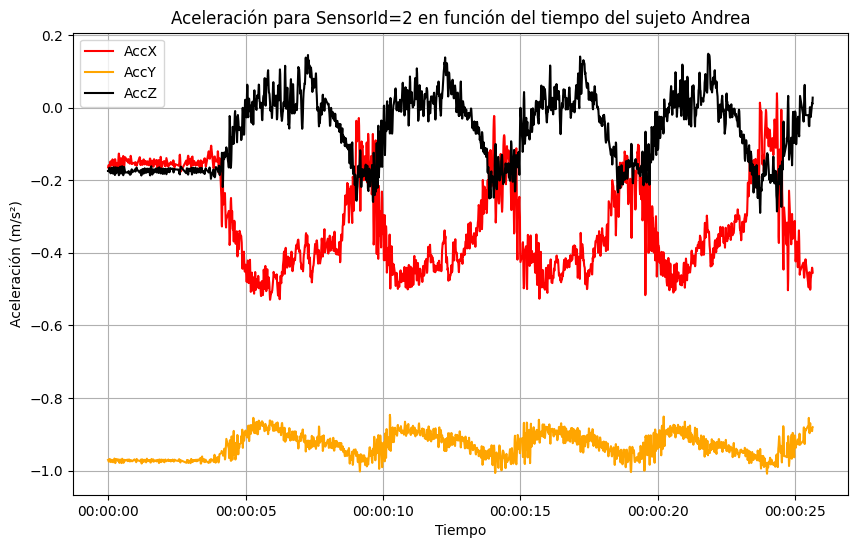

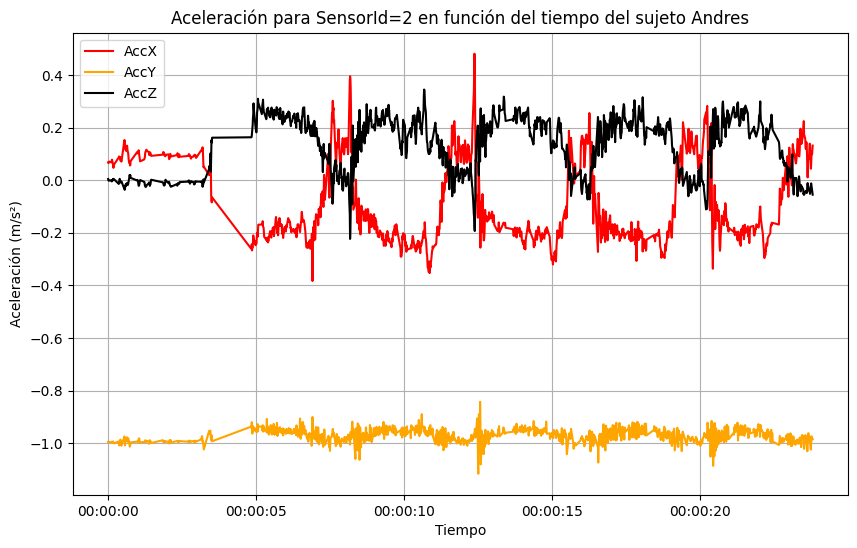

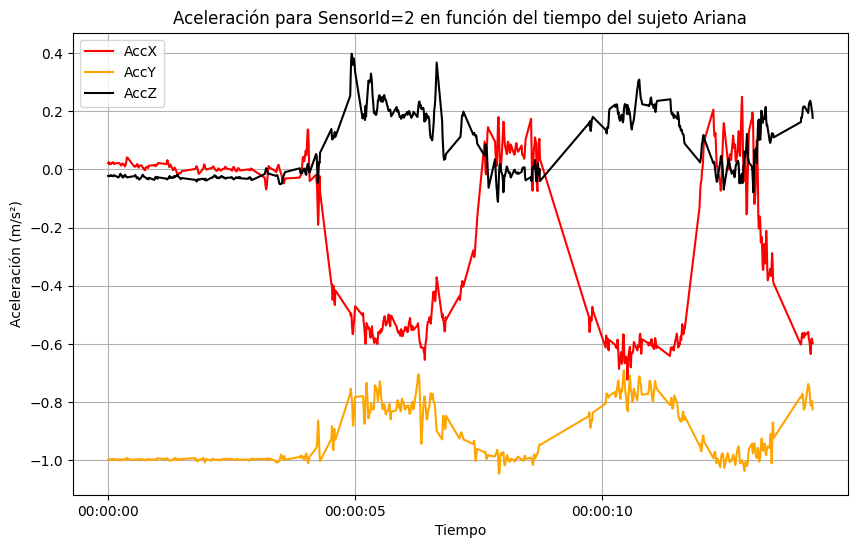

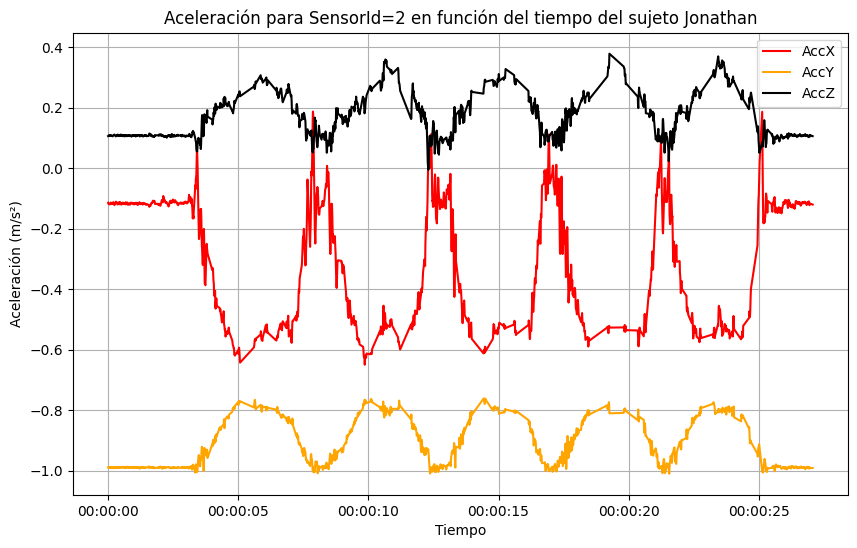

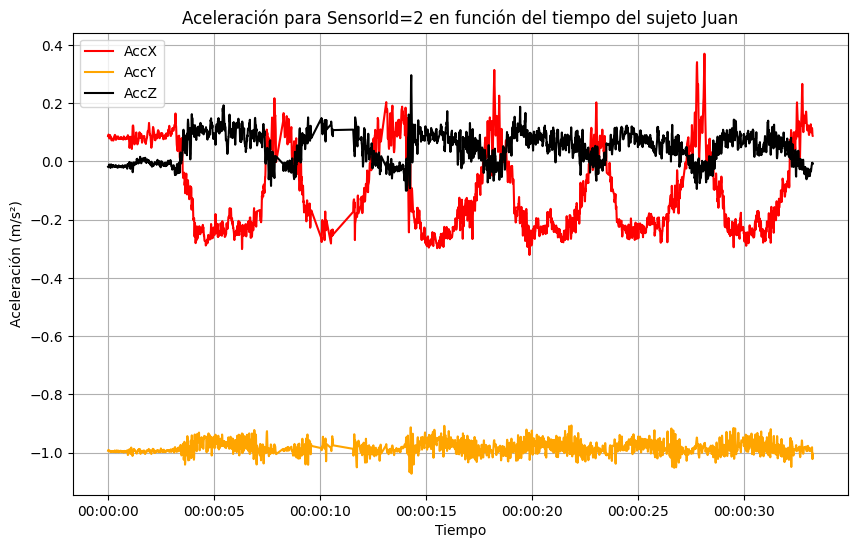

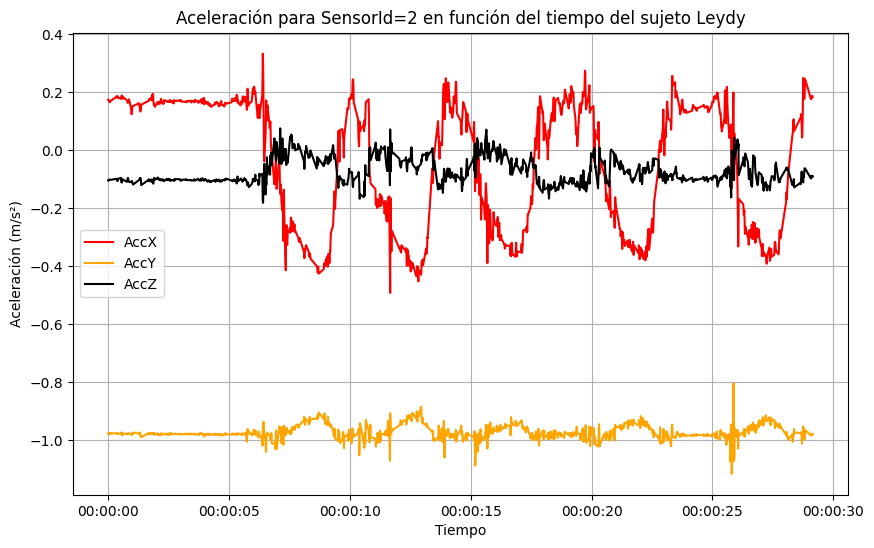

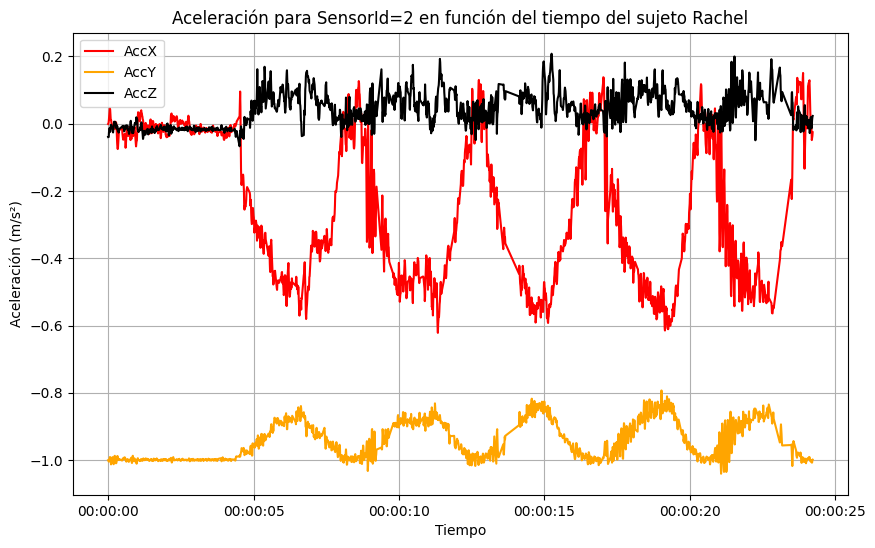

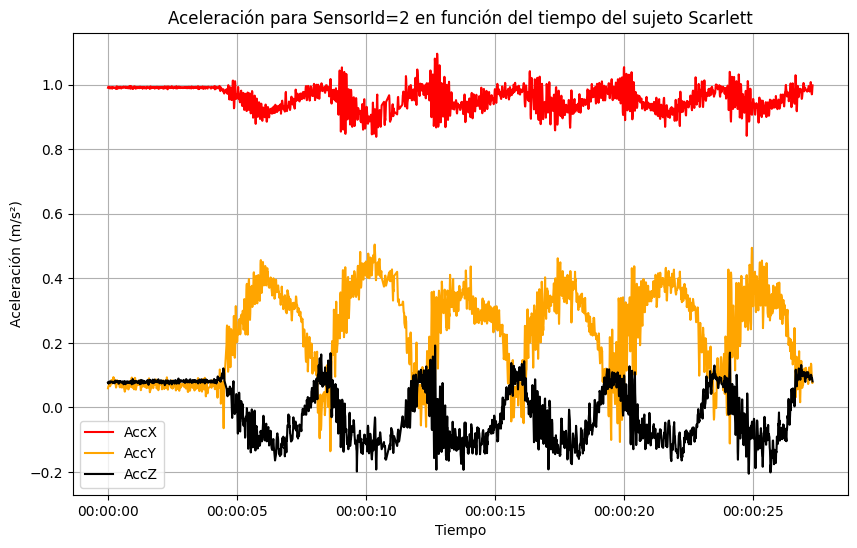

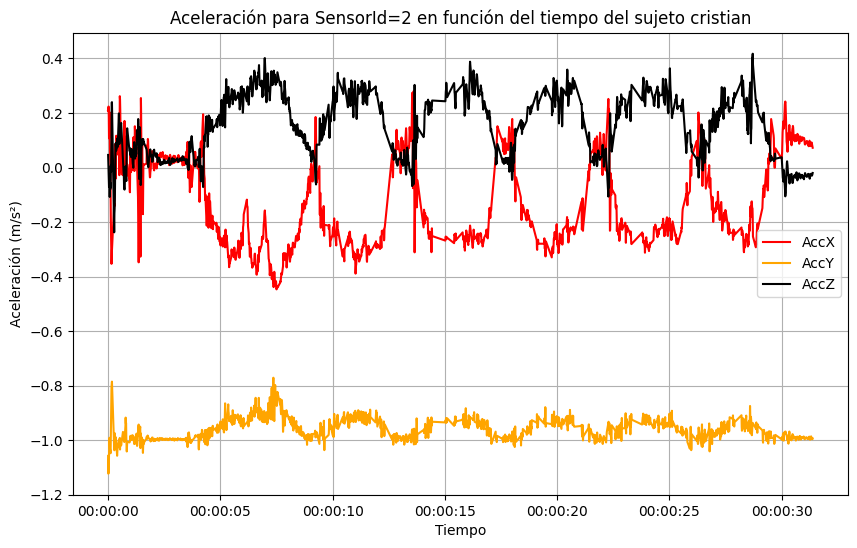

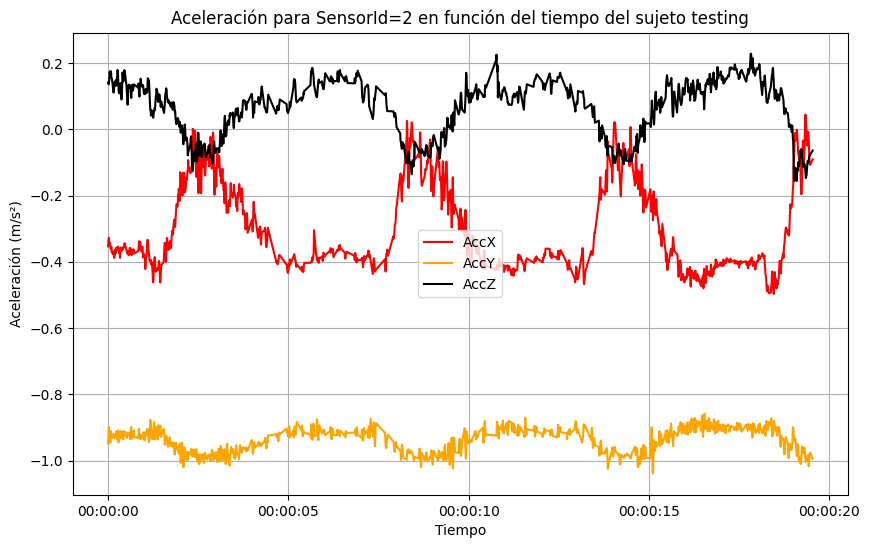

In [53]:
for index in list_df:
    df = list_df[index]
    
    df_sensor_id = df[df['SensorId'] == 2]  

    plt.figure(figsize=(10, 6))
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['AccX'], label='AccX', color='red')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['AccY'], label='AccY', color='orange')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['AccZ'], label='AccZ', color='black')
    plt.title(f'Aceleración para SensorId=2 en función del tiempo del sujeto {index}')
    plt.xlabel('Tiempo')
    plt.ylabel('Aceleración (m/s²)')
    plt.legend()
    plt.grid(True)
    plt.show()



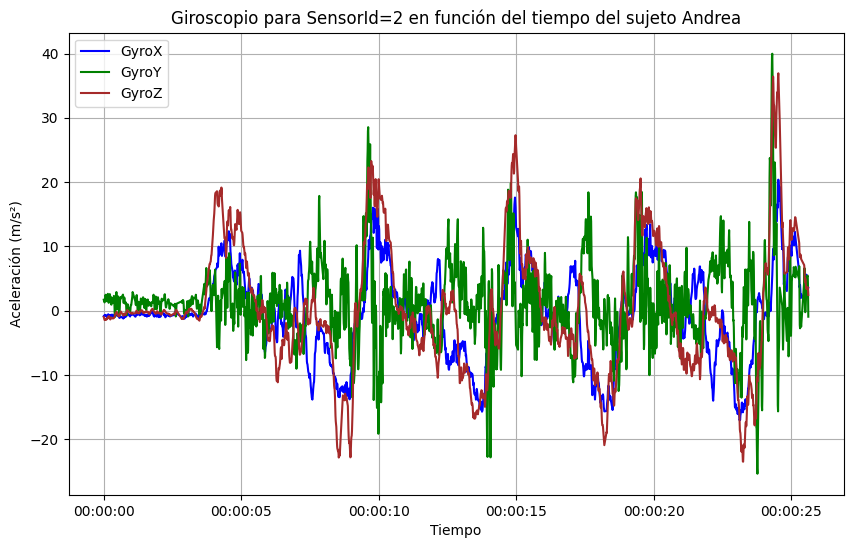

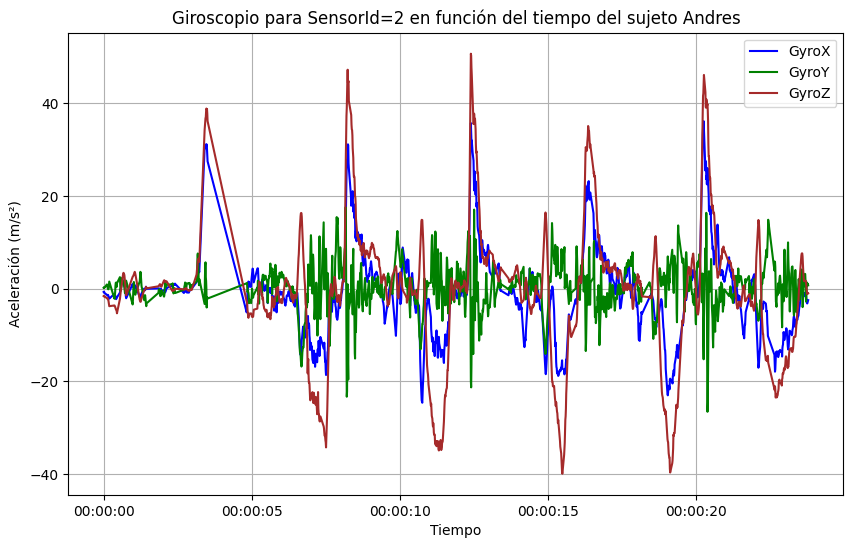

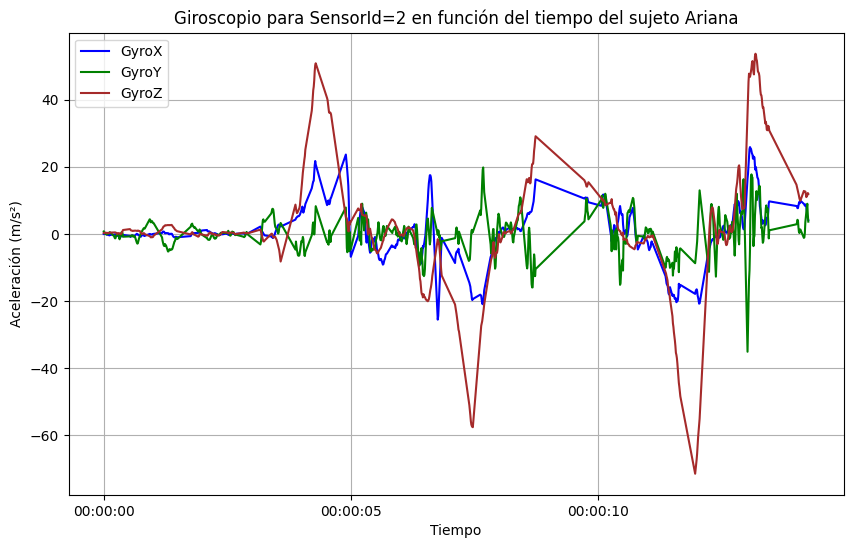

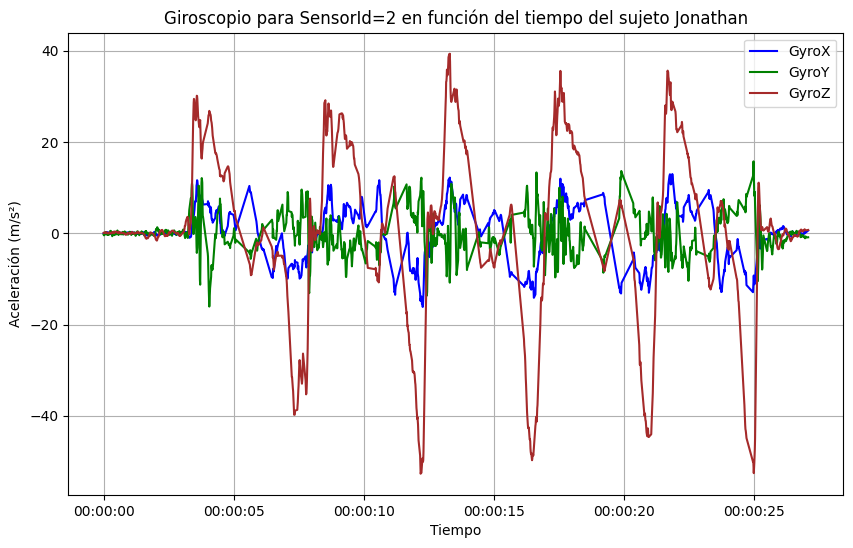

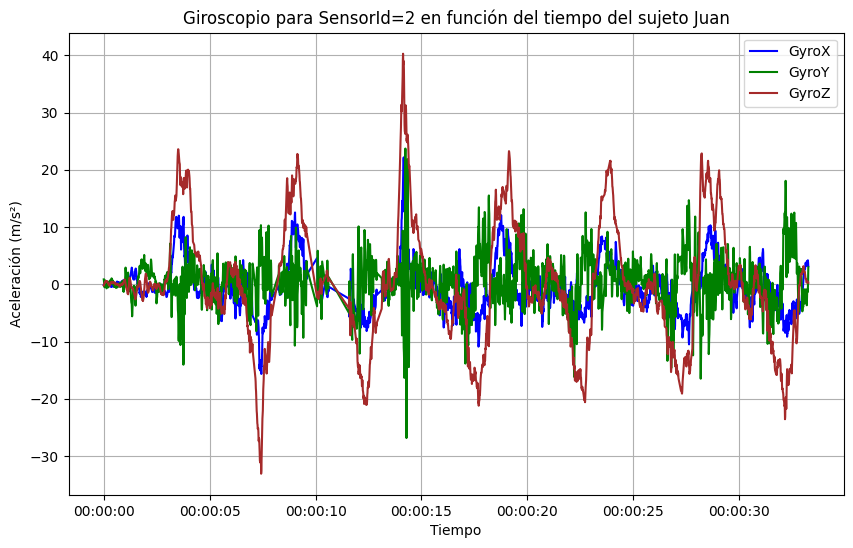

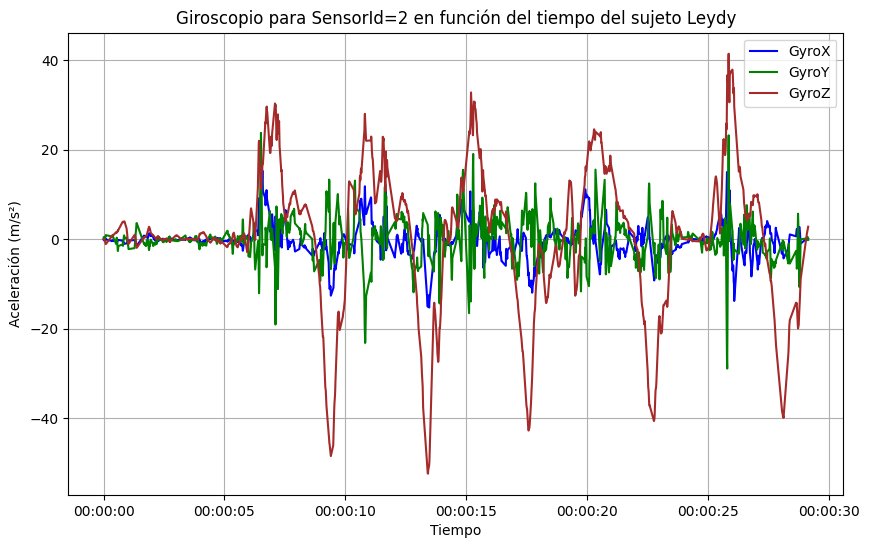

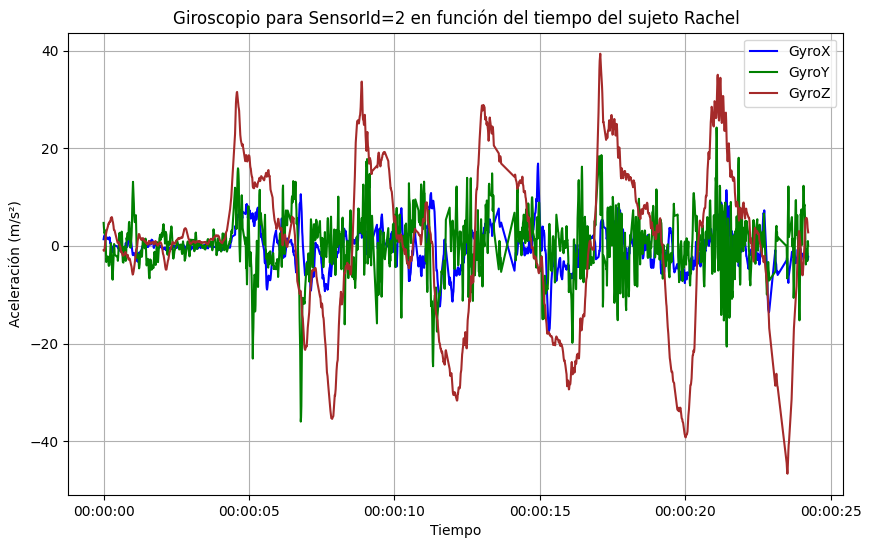

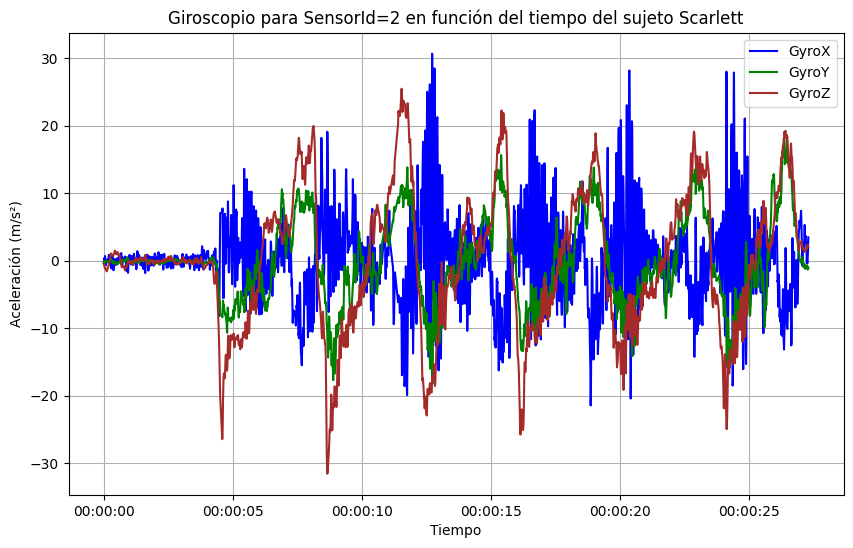

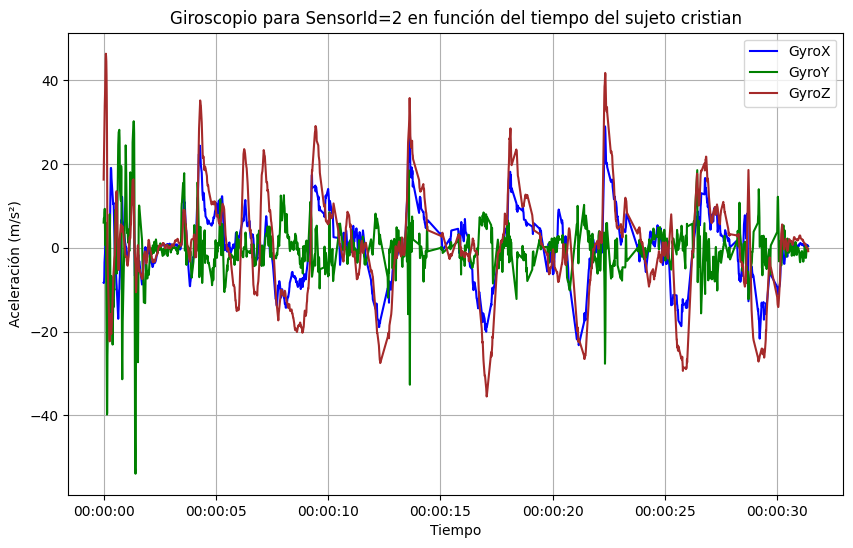

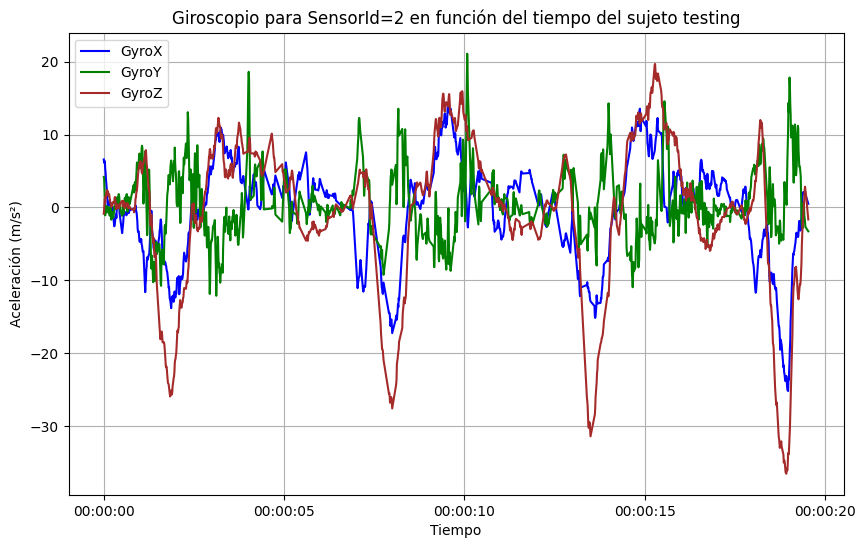

In [54]:
for index in list_df:
    df = list_df[index]
    
    df_sensor_id = df[df['SensorId'] == 2]  

    plt.figure(figsize=(10, 6))
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['GyroX'], label='GyroX', color='blue')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['GyroY'], label='GyroY', color='green')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['GyroZ'], label='GyroZ', color='brown')
    plt.title(f'Giroscopio para SensorId=2 en función del tiempo del sujeto {index}')
    plt.xlabel('Tiempo')
    plt.ylabel('Aceleración (m/s²)')
    plt.legend()
    plt.grid(True)
    plt.show()

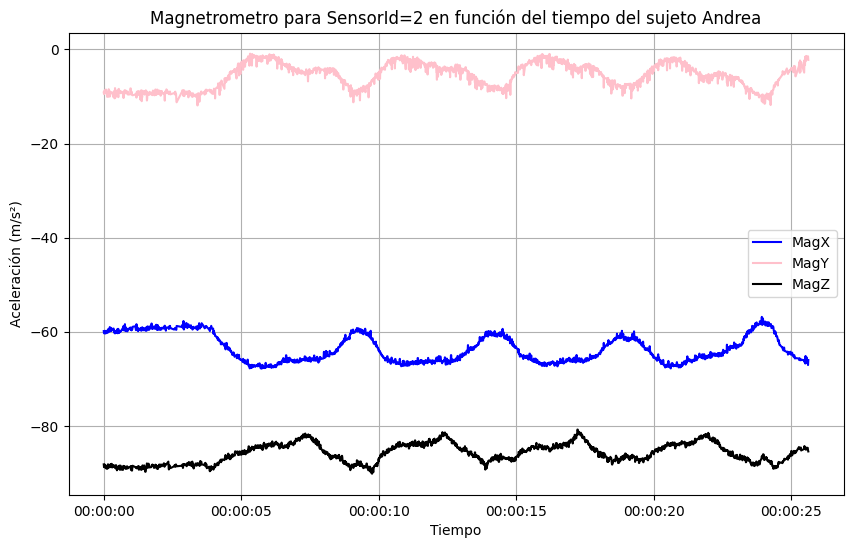

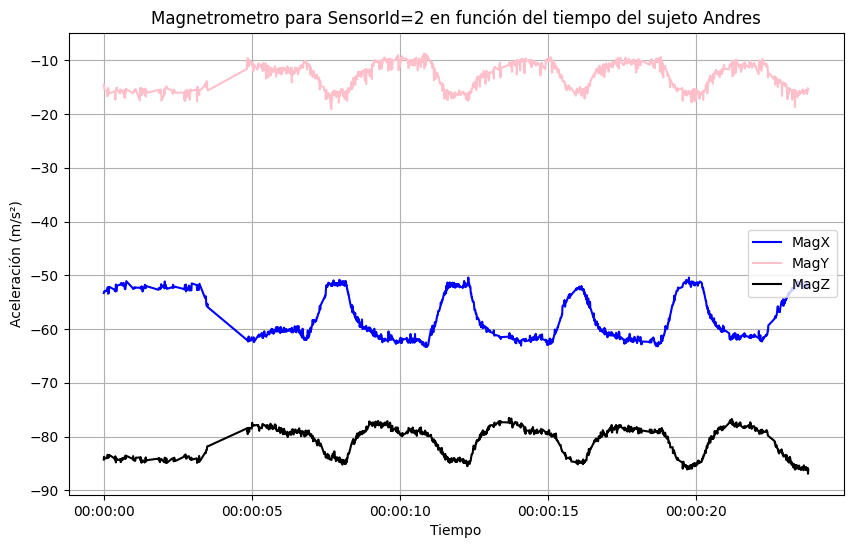

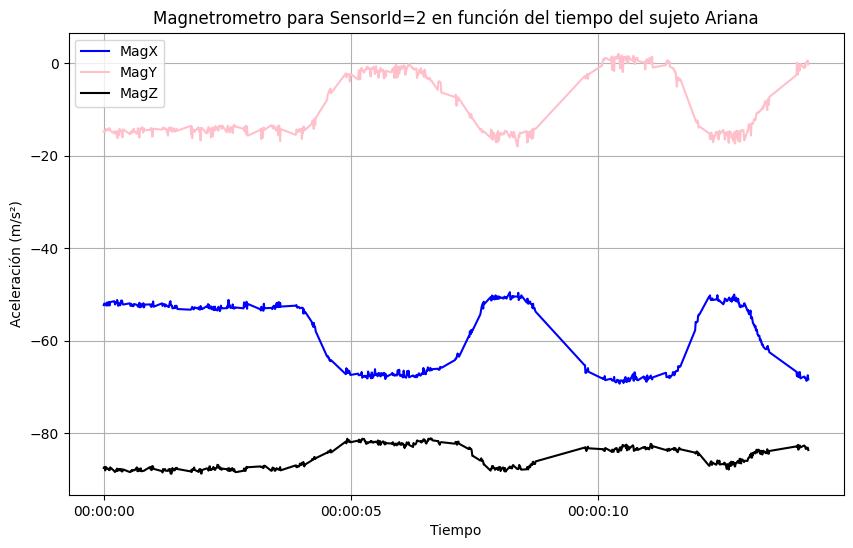

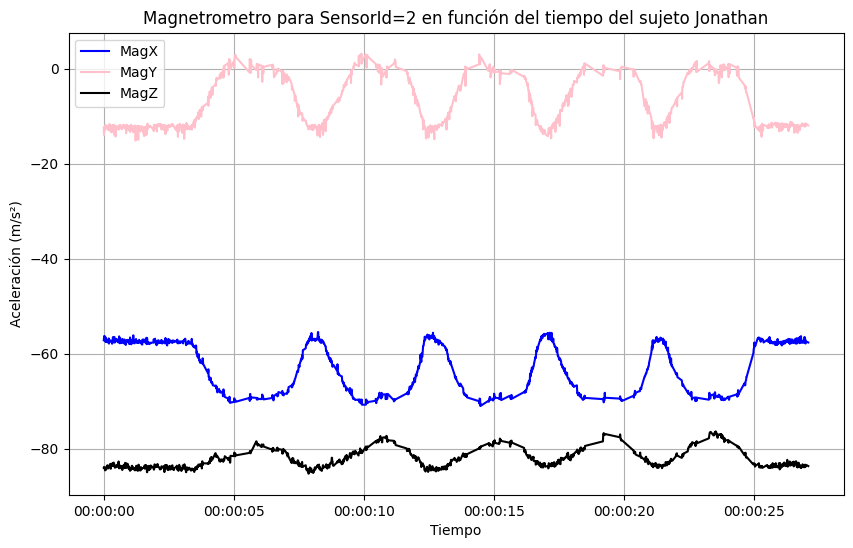

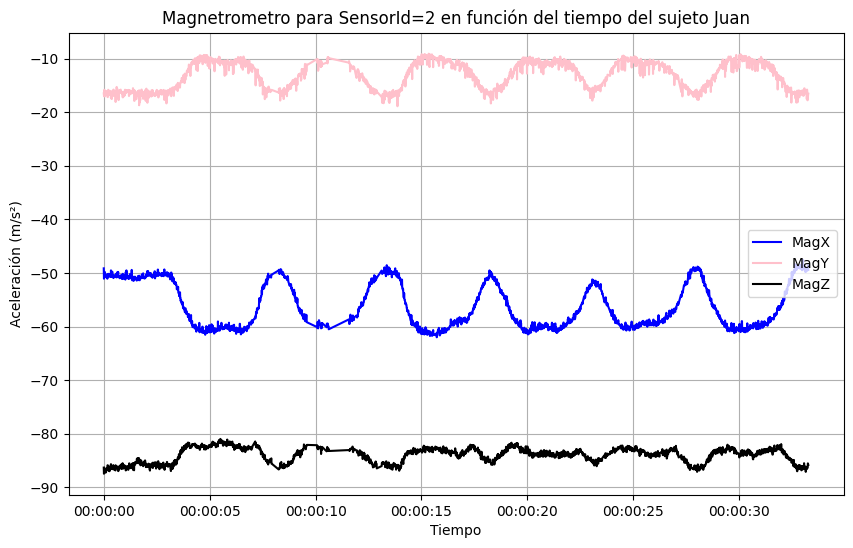

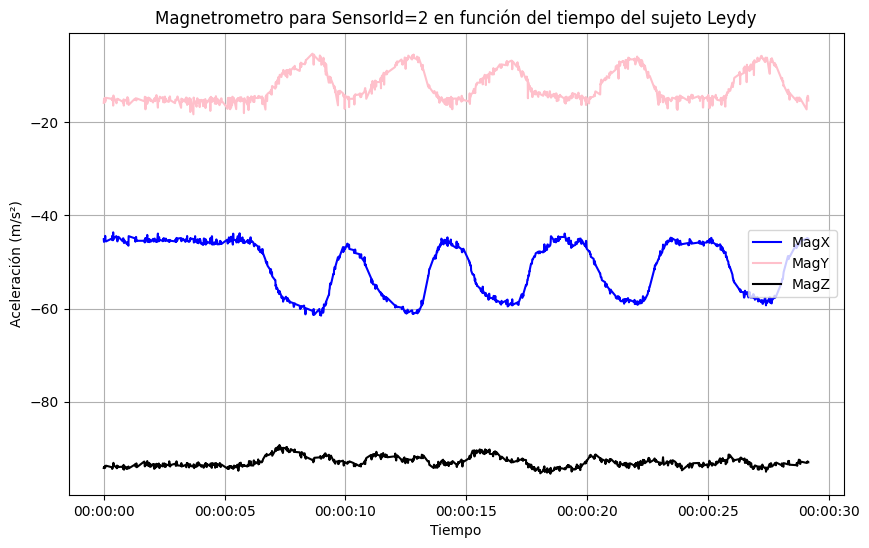

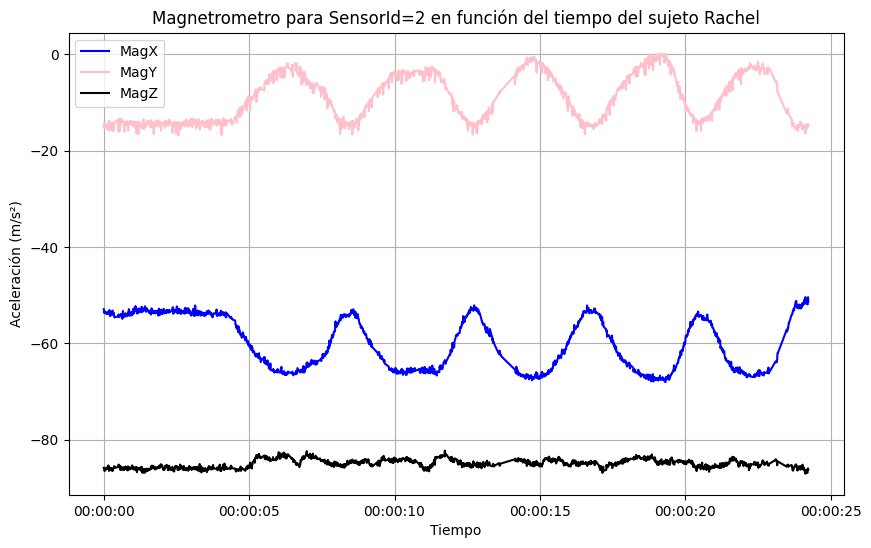

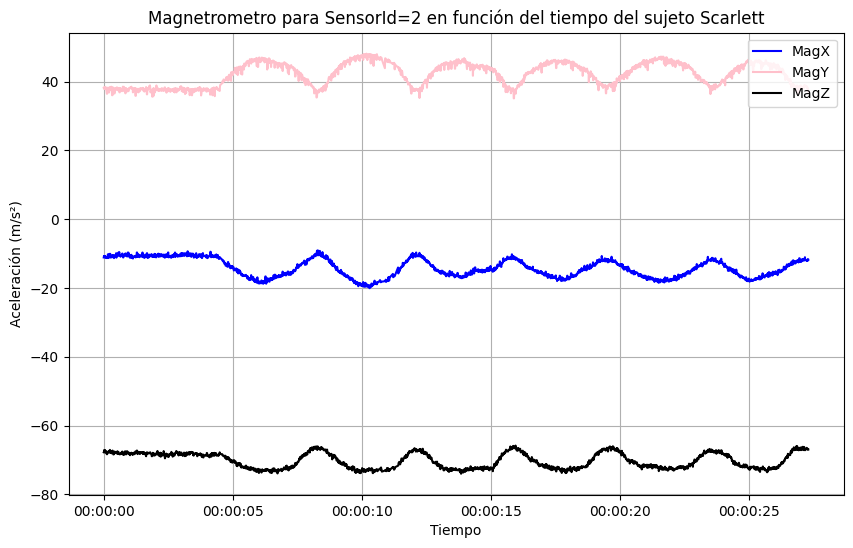

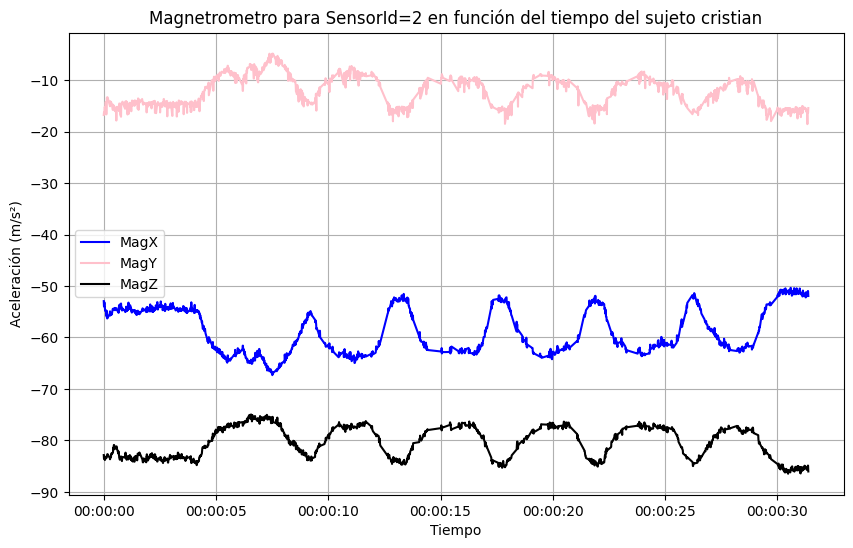

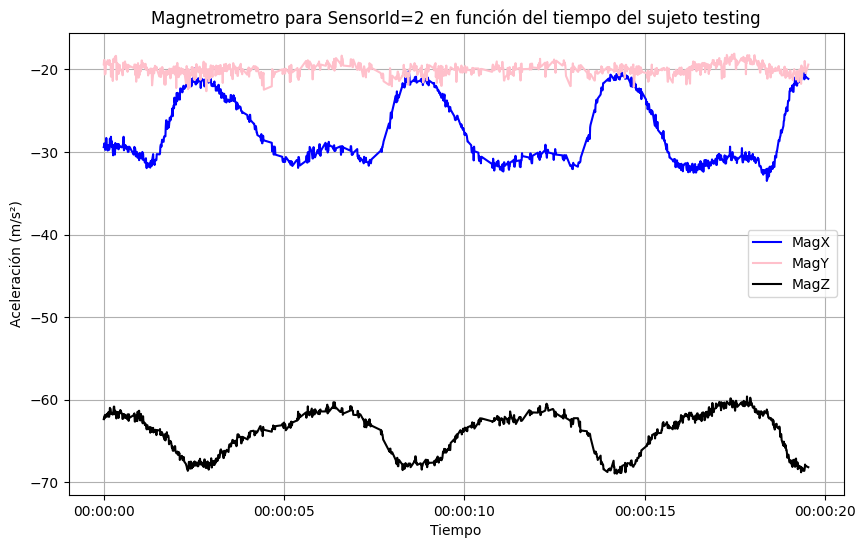

In [55]:
for index in list_df:
    df = list_df[index]
    
    df_sensor_id = df[df['SensorId'] == 2]  

    plt.figure(figsize=(10, 6))
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['MagX'], label='MagX', color='blue')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['MagY'], label='MagY', color='pink')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['MagZ'], label='MagZ', color='black')
    plt.title(f'Magnetrometro para SensorId=2 en función del tiempo del sujeto {index}')
    plt.xlabel('Tiempo')
    plt.ylabel('Aceleración (m/s²)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Procesamiento de Datos

Este código se encarga de limpiar los nombres de las columnas eliminando espacios innecesarios y texto dentro de paréntesis usando expresiones regulares, y actualiza los nombres de las columnas en cada DataFrame para garantizar consistencia y facilidad de acceso a los datos.

In [48]:
# Función para limpiar los nombres de las columnas
def limpiar_nombre_columnas(nombre):
    # Elimina espacios al principio y al final, y contenido en paréntesis
    nombre_limpio = re.sub(r'\s*\([^)]*\)', '', nombre).strip()
    return nombre_limpio

# Aplicar la limpieza a los nombres de las columnas de cada DataFrame
for key, df in list_df.items():
    df.rename(columns={col: limpiar_nombre_columnas(col) for col in df.columns}, inplace=True)

In [49]:
for index in list_df:
    list_df[index]['TimeStamp'] = pd.to_datetime(list_df[index]['TimeStamp'], unit='s')

In [50]:
list_df['Andrea'].columns

Index(['SensorId', 'TimeStamp', 'FrameNumber', 'AccX', 'AccY', 'AccZ', 'GyroX',
       'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ', 'EulerX', 'EulerY', 'EulerZ',
       'QuatW', 'QuatX', 'QuatY', 'QuatZ', 'LinAccX', 'LinAccY', 'LinAccZ',
       'Pressure', 'Altitude', 'Temperature', 'HeaveMotion'],
      dtype='object')

In [51]:
list_df['Andrea']

SensorId                  TimeStamp  FrameNumber      AccX      AccY  \
0            4 1970-01-01 00:00:00.000000            0  0.068477 -0.912087   
1            1 1970-01-01 00:00:00.000000            0  0.066376 -0.999555   
2            1 1970-01-01 00:00:00.010000            1  0.058749 -1.001864   
3            1 1970-01-01 00:00:00.020000            2  0.052185 -1.004004   
4            1 1970-01-01 00:00:00.030000            3  0.047747 -1.008838   
...        ...                        ...          ...       ...       ...   
8832         2 1970-01-01 00:00:25.630100         2299 -0.454521 -0.880524   
8833         3 1970-01-01 00:00:25.590000         2223  0.430438 -0.918506   
8834         4 1970-01-01 00:00:26.420000         2621  0.109173 -0.227898   
8835         3 1970-01-01 00:00:25.600000         2224  0.423440 -0.908016   
8836         4 1970-01-01 00:00:26.430000         2622  0.095565 -0.190173   

          AccZ      GyroX      GyroY     GyroZ       MagX  ...     QuatX  \
0    -0.383380   1.833206  -0.045396  0.063953 -23.969599  ...  0.000000   
1     0.080106  -0.186473   0.771407 -1.015720 -47.033031  ... -0.001200   
2     0.082250  -0.363923   0.525834 -0.746620 -47.091492  ... -0.001171   
3     0.081673   0.067433   0.339616 -0.618345 -46.448406  ... -0.001620   
4     0.079371   0.327756  -0.387092 -0.698904 -46.769951  ... -0.001646   
...        ...        ...        ...       ...        ...  ...       ...   
8832  0.027616   3.595888  -0.941252  2.442337 -66.004089  ... -0.130685   
8833  0.080576  -0.775975   7.144113 -8.995694 -12.160187  ... -0.058979   
8834 -0.974022 -38.953529   9.114608 -5.266281 -26.191172  ...  0.000000   
8835  0.112348  -1.892509  10.033885 -8.801491 -12.715580  ... -0.059069   
8836 -1.007332 -53.423641  -3.227295  0.088869 -26.015785  ...  0.000000   

         QuatY     QuatZ   LinAccX   LinAccY   LinAccZ  Pressure  Altitude  \
0     0.000000  0.000000  0.000000  0.000000  0.000000       0.0       0.0   
1     0.002248  0.001738 -0.000798  0.004874  0.004934       0.0       0.0   
2     0.002187  0.001685  0.007115  0.006890  0.006854       0.0       0.0   
3     0.003778  0.001716  0.013101  0.005960  0.008488       0.0       0.0   
4     0.003714  0.001747  0.015503  0.002597  0.012837       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
8832  0.120562 -0.345079 -0.009045  0.025488 -0.010969       0.0       0.0   
8833 -0.202557  0.069933 -0.001030  0.034472  0.014933       0.0       0.0   
8834  0.000000  0.000000  0.000000  0.000000  0.000000       0.0       0.0   
8835 -0.203303  0.069033  0.006956  0.065329  0.003487       0.0       0.0   
8836  0.000000  0.000000  0.000000  0.000000  0.000000       0.0       0.0   

      Temperature  HeaveMotion  
0             0.0          0.0  
1             0.0          0.0  
2             0.0          0.0  
3             0.0          0.0  
4             0.0          0.0  
...           ...          ...  
8832          0.0          0.0  
8833          0.0          0.0  
8834          0.0          0.0  
8835          0.0          0.0  
8836          0.0          0.0  

[8837 rows x 26 columns]

In [56]:
for index in list_df:
    if index in ["Scarlett", "Juan", "Ariana", "Rachel"]:
        # Actualizar SensorId de 3 a 4
        list_df[index].loc[list_df[index]['SensorId'] == 3, 'SensorId'] = 4

In [57]:
for persona in ["Scarlett", "Juan", "Ariana", "Rachel"]:
    print(persona,list_df[persona]["SensorId"].value_counts())

Scarlett SensorId
2    2614
1    2379
4    2339
Name: count, dtype: int64
Juan SensorId
1    3241
4    3031
2    2878
Name: count, dtype: int64
Ariana SensorId
1    2000
4    1953
2     718
Name: count, dtype: int64
Rachel SensorId
1    2373
4    2338
2    2026
Name: count, dtype: int64


## Segmentacion

En esta secci&oacute;n se encargo de segmentar en base al tiempo de ejecuci&oacute;n de las sentadillas hechas por los voluntarios.

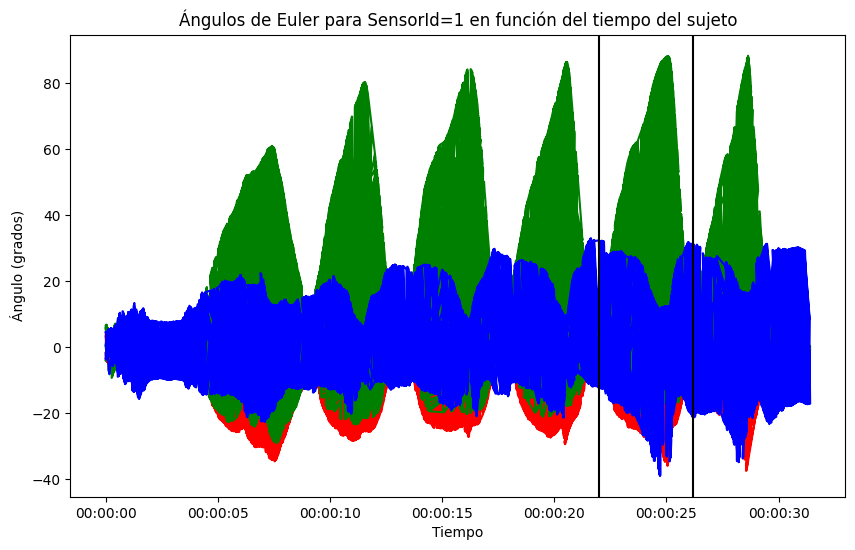

In [118]:
df_sensor_id = list_df["cristian"]
start_time = 22 # Tiempo donde empieza la sentadilla
end_time = 26.2 # Tiempo donde termina la sentadilla

start_time = pd.to_datetime(start_time, unit='s')
end_time = pd.to_datetime(end_time, unit='s')

# Filtrar los datos para la ventana de tiempo deseada
mask = (df['TimeStamp'] >= start_time) & (df['TimeStamp'] <= end_time)
df_time_window = df.loc[mask]
# Graficar los ángulos de Euler en función del tiempo para SensorId igual a 1
plt.figure(figsize=(10, 6))
plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerX'], label='EulerX', color='red')
plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerY'], label='EulerY', color='green')
plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerZ'], label='EulerZ', color='blue')
plt.axvline(x=start_time, color='black', linestyle='-', label='Tiempo Establecido')
plt.axvline(x=end_time, color='black', linestyle='-', label='Tiempo Establecido')
plt.title(f'Ángulos de Euler para SensorId=1 en función del tiempo del sujeto')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo (grados)')
plt.show()
# no mover

## Extracci&oacute;n de Caracter&iacute;sticas

## Selecci&oacute;n de Caracter&iacute;sticas

## Modelos a Evaluar

## Evaluando el mejor modelo

## Entrenando al modelo

## Implementando el modelo

## Conclusiones